In [33]:
import pandas as pd
import numpy as np

import missingno as msno # 결측치 확인용 graph 


# 데이터 불러오기
배추, 대파, 마늘, 무, 고추(건고추)

강수량(평균,최대), 기온(평균,최고,최저), 습도(평균,최저), 풍속(평균,최대)
거래량, 가격 

In [203]:
path = "./Dataset/"

#df = pd.read_csv(path+"da_data.csv")
df = pd.read_csv(path+"da_data_nozero.csv")

In [204]:
df

,날짜,평균강수량,최대강수량,평균기온,최고기온,최저기온,평균습도,최저습도,평균풍속,최대풍속,건고추가격,건고추거래량,배추가격,배추거래량,대파가격,대파거래량,마늘가격,마늘거래량,무가격,무거래량
0,2014-01-03,0.0,0.0,2.6,10.1,-3.2,54,12,1.2,9.6,0.00000,0.00,471.249011,549.64,857.382976,408.89,3530.248412,77.13,307.198836,833.98
1,2014-01-04,1.2,31.0,1.5,6.9,-2.8,63,12,1.7,11.9,0.00000,0.00,425.448876,423.95,891.743009,322.98,2409.531445,17.65,300.931167,615.89
2,2014-01-06,0.0,11.0,0.2,7.6,-5.1,59,12,1.1,7.7,0.00000,0.00,405.150325,611.48,948.409142,355.81,2822.186551,23.05,264.600638,870.91
3,2014-01-07,0.0,1.5,1.9,7.8,-4.3,60,16,1.1,8.0,0.00000,0.00,398.988782,493.86,932.950637,314.98,2354.123386,14.25,250.029575,818.27
4,2014-01-08,1.8,41.3,2.1,5.3,-1.4,65,25,2.4,17.7,0.00000,0.00,414.176624,343.29,987.608584,283.17,2408.945798,15.76,249.798757,599.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,2021-11-02,0.3,10.9,10.9,17.1,6.0,75,28,1.3,11.6,11971.89808,1.51,609.470751,1750.03,1283.080893,630.13,6286.589514,157.07,400.806844,2399.58
2427,2021-11-03,0.1,1.5,11.0,17.8,5.6,74,10,1.1,11.0,9445.59644,2.42,656.528378,1780.28,1300.993601,637.09,6869.454022,110.99,420.406337,2300.00
2428,2021-11-04,0.4,8.1,11.5,18.9,6.0,75,15,1.0,7.0,11164.84516,1.78,683.763982,1818.99,1288.978649,619.61,6321.296450,126.64,438.661088,2191.04
2429,2021-11-05,0.0,0.2,11.5,19.2,5.6,74,19,1.0,7.3,11821.50584,1.11,843.963716,1865.10,1317.351936,611.46,6444.043650,112.39,460.635042,2216.05


In [205]:
df.columns

Index(['날짜', '평균강수량', '최대강수량', '평균기온', '최고기온', '최저기온', '평균습도', '최저습도', '평균풍속',
       '최대풍속', '건고추가격', '건고추거래량', '배추가격', '배추거래량', '대파가격', '대파거래량', '마늘가격',
       '마늘거래량', '무가격', '무거래량'],
      dtype='object')

In [206]:
# 가격이 0인 데이터 확인 -> 거래량도 동일 
# 건고추 986 / 배추 444 / 무 442 / 마늘 466 / 대파 442
isZero = df['배추가격'] == 0 
df[isZero]

,날짜,평균강수량,최대강수량,평균기온,최고기온,최저기온,평균습도,최저습도,평균풍속,최대풍속,건고추가격,건고추거래량,배추가격,배추거래량,대파가격,대파거래량,마늘가격,마늘거래량,무가격,무거래량
649,2016-02-07,0.0,0.2,-1.8,5.0,-8.0,52,5,1.5,14.8,0.0,0.0,0.0,0.0,2300.000000,0.8,0.0,0.0,2200.000000,0.08
944,2017-01-22,0.6,7.6,-3.7,0.1,-6.9,56,21,3.6,20.8,0.0,0.0,0.0,0.0,2183.333333,0.3,0.0,0.0,0.000000,0.00
1881,2020-01-27,15.4,113.6,5.7,7.8,4.0,78,35,3.3,15.3,0.0,0.0,0.0,0.0,880.000000,2.0,0.0,0.0,0.000000,0.00
2096,2020-10-03,2.6,21.9,19.3,23.9,16.5,83,32,1.0,5.9,0.0,0.0,0.0,0.0,3783.928571,0.5,0.0,0.0,834.677419,3.10
2269,2021-04-26,0.0,0.0,13.7,20.2,7.0,55,13,1.8,9.9,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2000.000000,0.02
2270,2021-04-28,0.3,4.7,15.9,21.1,11.4,60,4,1.9,12.6,0.0,0.0,0.0,0.0,3002.794118,6.8,0.0,0.0,0.000000,0.00
2332,2021-07-10,6.5,40.2,24.7,29.5,21.8,86,39,1.6,10.9,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,246.031746,5.04
2333,2021-07-12,0.4,15.8,26.7,32.0,22.8,82,42,1.4,11.5,0.0,0.0,0.0,0.0,0.000000,0.0,2100.0,0.3,0.000000,0.00


In [221]:
df['건고추가격'].value_counts()

0.000000        550
7500.000000      26
15000.000000     26
12000.000000     20
10000.000000     19
               ... 
11600.528400      1
9701.345445       1
11029.106630      1
23612.433990      1
24333.333330      1
Name: 건고추가격, Length: 1642, dtype: int64

In [207]:
print(df['건고추가격'].unique())
print(df['건고추가격'].nunique())
print(df.info())

[    0.        5850.        5970.441176 ... 11164.84516  11821.50584
 10752.33234 ]
1642
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431 entries, 0 to 2430
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      2431 non-null   object 
 1   평균강수량   2431 non-null   float64
 2   최대강수량   2431 non-null   float64
 3   평균기온    2431 non-null   float64
 4   최고기온    2431 non-null   float64
 5   최저기온    2431 non-null   float64
 6   평균습도    2431 non-null   int64  
 7   최저습도    2431 non-null   int64  
 8   평균풍속    2431 non-null   float64
 9   최대풍속    2431 non-null   float64
 10  건고추가격   2431 non-null   float64
 11  건고추거래량  2431 non-null   float64
 12  배추가격    2431 non-null   float64
 13  배추거래량   2431 non-null   float64
 14  대파가격    2431 non-null   float64
 15  대파거래량   2431 non-null   float64
 16  마늘가격    2431 non-null   float64
 17  마늘거래량   2431 non-null   float64
 18  무가격     2431 non-null   float64
 19  무거래량    2431 non-null 

<AxesSubplot:>

C:\Users\Hyeongbin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hyeongbin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hyeongbin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hyeongbin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hyeongbin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hyeongbin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Gl

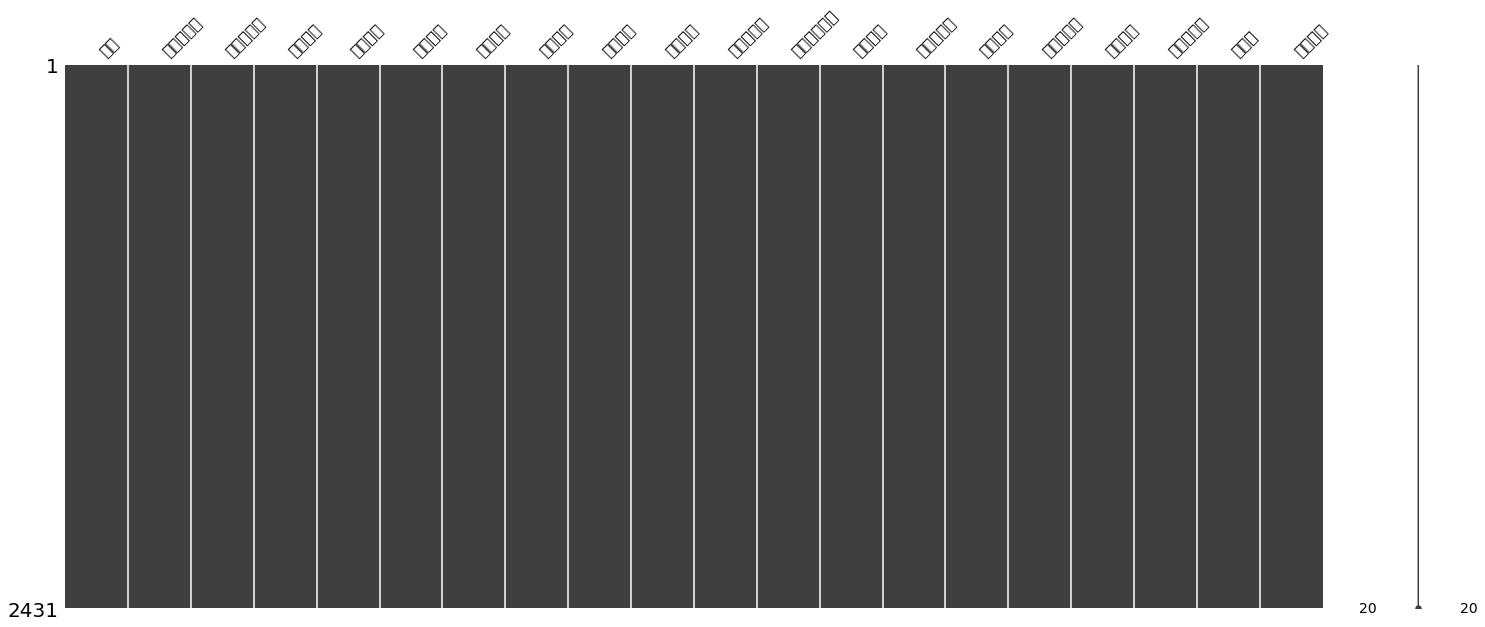

In [208]:
msno.matrix(df)

In [209]:
df.describe()

,평균강수량,최대강수량,평균기온,최고기온,최저기온,평균습도,최저습도,평균풍속,최대풍속,건고추가격,건고추거래량,배추가격,배추거래량,대파가격,대파거래량,마늘가격,마늘거래량,무가격,무거래량
count,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000
mean,3.380337,25.204401,13.484903,18.956849,8.720814,68.198272,23.117236,1.885027,12.019951,9961.630639,1.885971,614.095219,897.446376,1428.592663,456.890045,3928.242010,83.549186,521.423585,1004.964755
std,8.548110,44.243197,9.428927,9.401797,9.876143,13.153673,13.167293,0.652818,4.268979,8594.106038,11.979551,319.899209,555.922253,714.026344,187.077150,1277.536258,101.727995,238.985869,503.608275
min,0.000000,0.000000,-12.300000,-7.300000,-16.800000,31.000000,0.000000,0.900000,5.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.300000,5.200000,10.800000,0.100000,58.000000,12.000000,1.400000,8.900000,5340.289855,0.002000,383.816935,571.345000,962.778987,314.770000,2930.186007,21.460000,348.518635,668.480000
50%,0.100000,6.400000,14.300000,20.500000,9.000000,70.000000,21.000000,1.700000,11.000000,9991.266376,0.130000,533.480377,779.830000,1269.239616,413.250000,3990.730994,52.030000,433.631681,878.760000
75%,2.000000,30.250000,21.700000,26.950000,17.700000,78.000000,32.000000,2.200000,14.100000,13759.465075,0.665000,775.405188,1064.550000,1691.104680,603.010000,4960.682628,112.960000,651.087850,1289.265000
max,101.900000,384.300000,30.300000,36.600000,25.900000,96.000000,66.000000,5.200000,49.000000,170045.888900,235.180000,3066.238778,4832.440000,5431.070105,1109.150000,11172.960400,1083.760000,2200.000000,4154.510000


# 전처리

In [210]:
from sklearn.preprocessing import MinMaxScaler

df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['평균강수량', '최대강수량', '평균기온', '최고기온', '최저기온', '평균습도', '최저습도', '평균풍속', '최대풍속',
       '건고추가격', '건고추거래량', '배추가격', '배추거래량', '대파가격', '대파거래량', '마늘가격', '마늘거래량', '무가격', '무거래량']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

df_scaled

,평균강수량,최대강수량,평균기온,최고기온,최저기온,평균습도,최저습도,평균풍속,최대풍속,건고추가격,건고추거래량,배추가격,배추거래량,대파가격,대파거래량,마늘가격,마늘거래량,무가격,무거래량
0,0.000000,0.000000,0.349765,0.396355,0.318501,0.353846,0.181818,0.069767,0.100457,0.000000,0.000000,0.153690,0.113740,0.157866,0.368652,0.315964,0.071169,0.139636,0.200741
1,0.011776,0.080666,0.323944,0.323462,0.327869,0.492308,0.181818,0.186047,0.152968,0.000000,0.000000,0.138753,0.087730,0.164193,0.291196,0.215657,0.016286,0.136787,0.148246
2,0.000000,0.028623,0.293427,0.339408,0.274005,0.430769,0.181818,0.046512,0.057078,0.000000,0.000000,0.132133,0.126536,0.174627,0.320795,0.252591,0.021269,0.120273,0.209630
3,0.000000,0.003903,0.333333,0.343964,0.292740,0.446154,0.242424,0.046512,0.063927,0.000000,0.000000,0.130123,0.102197,0.171780,0.283983,0.210698,0.013149,0.113650,0.196959
4,0.017664,0.107468,0.338028,0.287016,0.360656,0.523077,0.378788,0.348837,0.285388,0.000000,0.000000,0.135076,0.071039,0.181844,0.255304,0.215605,0.014542,0.113545,0.144248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,0.002944,0.028363,0.544601,0.555809,0.533958,0.676923,0.424242,0.093023,0.146119,0.070404,0.006421,0.198768,0.362142,0.236248,0.568120,0.562661,0.144931,0.182185,0.577584
2427,0.000981,0.003903,0.546948,0.571754,0.524590,0.661538,0.151515,0.046512,0.132420,0.055547,0.010290,0.214115,0.368402,0.239546,0.574395,0.614828,0.102412,0.191094,0.553615
2428,0.003925,0.021077,0.558685,0.596811,0.533958,0.676923,0.227273,0.023256,0.041096,0.065658,0.007569,0.222998,0.376412,0.237334,0.558635,0.565767,0.116852,0.199391,0.527388
2429,0.000000,0.000520,0.558685,0.603645,0.524590,0.661538,0.287879,0.023256,0.047945,0.069520,0.004720,0.275244,0.385954,0.242558,0.551287,0.576753,0.103704,0.209380,0.533408


## 평가 지표 함수 작성 

In [257]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(test_y, pred) :
    confusion = confusion_matrix(test_y, pred)
    accuracy = accuracy_score(test_y, pred)
    precision = precision_score(test_y, pred)
    recall = recall_score(test_y, pred)
    # Add F1 score 
    f1 = f1_score(test_y, pred)
    # Add ROC-AUC 
    #roc_auc = roc_auc_score(test_y, pred_proba)
    print('오차 행렬')
    print(confusion)
    # Add f1 score print 
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'
         .format(accuracy, precision, recall, f1))

# 모델 학습 준비 
xgboost , lightgbm, ensemble 3가지 방법으로 예측해볼 예정

In [246]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.svm import SVR 
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

from sklearn.ensemble import RandomForestClassifier

In [247]:
X_column = ['평균강수량', '최대강수량', '평균기온', '최고기온', '최저기온', '평균습도', '최저습도', '평균풍속',
       '최대풍속', '배추거래량']
y_column = '배추가격'

input_data = df_scaled[X_column + [y_column]].copy()
input_data 

,평균강수량,최대강수량,평균기온,최고기온,최저기온,평균습도,최저습도,평균풍속,최대풍속,배추거래량,배추가격
0,0.000000,0.000000,0.349765,0.396355,0.318501,0.353846,0.181818,0.069767,0.100457,0.113740,0.153690
1,0.011776,0.080666,0.323944,0.323462,0.327869,0.492308,0.181818,0.186047,0.152968,0.087730,0.138753
2,0.000000,0.028623,0.293427,0.339408,0.274005,0.430769,0.181818,0.046512,0.057078,0.126536,0.132133
3,0.000000,0.003903,0.333333,0.343964,0.292740,0.446154,0.242424,0.046512,0.063927,0.102197,0.130123
4,0.017664,0.107468,0.338028,0.287016,0.360656,0.523077,0.378788,0.348837,0.285388,0.071039,0.135076
...,...,...,...,...,...,...,...,...,...,...,...
2426,0.002944,0.028363,0.544601,0.555809,0.533958,0.676923,0.424242,0.093023,0.146119,0.362142,0.198768
2427,0.000981,0.003903,0.546948,0.571754,0.524590,0.661538,0.151515,0.046512,0.132420,0.368402,0.214115
2428,0.003925,0.021077,0.558685,0.596811,0.533958,0.676923,0.227273,0.023256,0.041096,0.376412,0.222998
2429,0.000000,0.000520,0.558685,0.603645,0.524590,0.661538,0.287879,0.023256,0.047945,0.385954,0.275244


In [248]:
# train / test data split 
tr_val_X, test_X, tr_val_y, test_y = train_test_split(
    input_data[X_column], 
    input_data[y_column],
    test_size=0.2,
    shuffle=True,   # random split 
    random_state=42) # seed 고정, same sampling 

print(tr_val_X.shape, test_X.shape)

(1944, 10) (487, 10)


In [249]:
# train / valid data split 
tr_val_data = pd.concat([tr_val_X, tr_val_y], axis=1)

train_X, valid_X, train_y, valid_y = train_test_split(
    tr_val_data[X_column],
    tr_val_data[y_column], 
    test_size = 0.2, 
    shuffle=True,
    random_state=42)

In [250]:
dtrain = xgb.DMatrix(data=train_X, label=train_y)
dtest = xgb.DMatrix(data=test_X, label=test_y)
wlist = [(dtrain, 'train'), (dtest,'eval')]

In [265]:
params = { 
    'max_depth':3,
    'eta':0.1,
    'objective':'reg:linear',
    'eval_metric':'logloss',
    'early_stoppings':100
}
num_rounds = 400 

model_xgb = xgb.XGBRegressor(params=params)
model_xgb.fit(dtrain, )
#model_xgb = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=100, evals=wlist)

'''
model_xgb = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, 
                          learning_rate = 0.05, max_depth = 5,
                             max_features='sqrt', min_samples_leaft=15, min_samples_split=10,
                             loss='huber', random_state=5,
                             alpha = 10, n_estimators = 10)
model_xgb.fit(train_X,train_y, eval_set=[(valid_X, valid_y)])
'''

AttributeError: 'XGBRegressor' object has no attribute 'train'

In [260]:
xgb_preds = model_xgb.predict(dtest)

In [258]:
get_clf_eval(test_y, xgb_preds)

ValueError: continuous is not supported

In [261]:
df_result = pd.DataFrame(list(zip(test_y, xgb_preds)), columns=['true_y', 'xgb_pred_y'])
df_result 

,true_y,xgb_pred_y
0,0.172620,0.151300
1,0.262258,0.170246
2,0.134936,0.180757
3,0.242089,0.255194
4,0.168451,0.210325
...,...,...
482,0.092992,0.146308
483,0.174550,0.244686
484,0.180483,0.193609
485,0.108427,0.223635


In [262]:
mse = mean_squared_error(test_y, xgb_preds)
print("mse:  %f" % mse)

rmse = np.sqrt(mse)
print("rmse: %f" %rmse)

mse:  0.009523
rmse: 0.097587


In [202]:
train_ds = lgb.Dataset(train_X, label= train_y)
val_ds = lgb.Dataset(valid_X, label = valid_y)
test_ds = lgb.Dataset(X_test, label = y_test)

model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=5,
                             learning_rate = 0.05, n_estimators=720,
                             max_bin =55, baggint_fraction =0.8, 
                             bagging_freq=5, feature_faction = 0.2319,
                             feature_fraction_seed=9, bagging_seed=9,
                             min_data_in_leaf=6, min_sum_hessian_in_leaf=11)

model_lgb.fit(train_X, train_y)
lgb_pred = model_lgb.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, lgb_pred))
print("RMSE: %f" % (rmse))

[LightGBM] [Warning] Unknown parameter: baggint_fraction
[LightGBM] [Warning] Unknown parameter: feature_faction
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
RMSE: 0.089476
